# **Introduction to ANN with Keras**

 Birds inspired us to fly, burdock plants inspired Velcro, and nature has
 inspired countless more inventions. It seems only logical, then, to look at
 the brain’s architecture for inspiration on how to build an intelligent
 machine. This is the logic that sparked artificial neural networks (ANNs),
 machine learning models inspired by the networks of biological neurons
 found in our brains. However, although planes were inspired by birds, they
 don’t have to flap their wings to fly. Similarly, ANNs have gradually
 become quite different from their biological cousins. Some researchers even
 argue that we should drop the biological analogy altogether (e.g., by saying
 “units” rather than “neurons”), lest we restrict our creativity to biologically
 plausible systems. 


 ANNs are at the very core of deep learning. They are versatile, powerful,
 and scalable, making them ideal to tackle large and highly complex
 machine learning tasks such as classifying billions of images (e.g., Google
 Images), powering speech recognition services (e.g., Apple’s Siri),
 recommending the best videos to watch to hundreds of millions of users
 every day (e.g., YouTube), or learning to beat the world champion at the
 game of Go (DeepMind’s AlphaGo).

 The first part of this chapter introduces artificial neural networks, starting
 with a quick tour of the very first ANN architectures and leading up to
 multilayer perceptrons, which are heavily used today (other architectures
 will be explored in the next chapters). In the second part, we will look at
 how to implement neural networks using TensorFlow’s Keras API. This is a
 beautifully designed and simple high-level API for building, training,
 evaluating, and running neural networks. But don’t be fooled by itssimplicity: it is expressive and flexible enough to let you build a wide
 variety of neural network architectures. In fact, it will probably be sufficient
 for most of your use cases. And should you ever need extra flexibility, you
 can always write custom Keras components using its lower-level API, or
 even use TensorFlow directly, as you will see in Chapter 12.


## **From Biological to Artificial Neurons**
Surprisingly, ANNs have been around for quite a while: they were first
 introduced back in 1943 by the neurophysiologist Warren McCulloch and
 the mathematician Walter Pitts. In their landmark paper  “A Logical
 Calculus of Ideas Immanent in Nervous Activity”, McCulloch and Pitts
 presented a simplified computational model of how biological neurons
 might work together in animal brains to perform complex computations
 using ***propositional*** logic. This was the first artificial neural network
 architecture. Since then many other architectures have been invented, as
 you will see.

The early successes of ANNs led to the widespread belief that we would
 soon be conversing with truly intelligent machines. When it became clear in
 the 1960s that this promise would go unfulfilled (at least for quite a while),
 funding flew elsewhere, and ANNs entered a long winter. In the early
 1980s, new architectures were invented and better training techniques were
 developed, sparking a revival of interest in ***connectionism***, the study of
 neural networks. But progress was slow, and by the 1990s other powerful
 machine learning techniques had been invented, such as support vector
 machines (see Chapter 5). These techniques seemed to offer better results
 and stronger theoretical foundations than ANNs, so once again the study of
 neural networks was put on hold.

We are now witnessing yet another wave of interest in ANNs. Will this
 wave die out like the previous ones did? Well, here are a few good reasons
to believe that this time is different and that the renewed interest in ANNs
 will have a much more profound impact on our lives:
-  There is now a huge quantity of data available to train neural networks,
 and ANNs frequently outperform other ML techniques on very large
 and complex problems.

-  The tremendous increase in computing power since the 1990s now
 makes it possible to train large neural networks in a reasonable amount
 of time. This is in part due to Moore’s law (the number of components
 in integrated circuits has doubled about every 2 years over the last 50
 years), but also thanks to the gaming industry, which has stimulated
 the production of powerful GPU cards by the millions. Moreover,
 cloud platforms have made this power accessible to everyone.

-  The training algorithms have been improved. To be fair they are only
 slightly different from the ones used in the 1990s, but these relatively
 small tweaks have had a huge positive impact.

-  Some theoretical limitations of ANNs have turned out to be benign in
 practice. For example, many people thought that ANN training
 algorithms were doomed because they were likely to get stuck in local
 optima, but it turns out that this is not a big problem in practice,
 especially for larger neural networks: the local optima often perform
 almost as well as the global optimum.

-  ANNs seem to have entered a virtuous circle of funding and progress.
 Amazing products based on ANNs regularly make the headline news,
 which pulls more and more attention and funding toward them,
 resulting in more and more progress and even more amazing products.

### **Biological Neurons**
 Before we discuss artificial neurons, let’s take a quick look at a biological
 neuron. It is an unusual-looking cell mostly
 found in animal brains. It’s composed of a cell body containing the nucleus
 and most of the cell’s complex components, many branching extensionscalled dendrites, plus one very long extension called the axon. The axon’s
 length may be just a few times longer than the cell body, or up to tens of
 thousands of times longer. Near its extremity the axon splits off into many
 branches called telodendria, and at the tip of these branches are minuscule
 structures called synaptic terminals (or simply synapses), which are
 connected to the dendrites or cell bodies of other neurons.  Biological
 neurons produce short electrical impulses called action potentials (APs, or
 just signals), which travel along the axons and make the synapses release
 chemical signals called neurotransmitters. When a neuron receives a
 sufficient amount of these neurotransmitters within a few milliseconds, it
 fires its own electrical impulses (actually, it depends on the
 neurotransmitters, as some of them inhibit the neuron from firing).
> ***Try finding the Biological neuron diagram for more demonstrations***.....

Thus, individual biological neurons seem to behave in a simple way, but
 they’re organized in a vast network of billions, with each neuron typically
 connected to thousands of other neurons. Highly complex computations can
 be performed by a network of fairly simple neurons, much like a complex  anthill can emerge from the combined efforts of simple ants. The
 architecture of biological neural networks (BNNs)  is the subject of active
 research, but some parts of the brain have been mapped. These efforts show
 that neurons are often organized in consecutive layers, especially in the
 cerebral cortex (the outer layer of the brain)

### **Logical Computations with Neurons**
 McCulloch and Pitts proposed a very simple model of the biological
 neuron, which later became known as an ***artificial neuron***: it has one or
 more binary (on/off) inputs and one binary output. The artificial neuron
 activates its output when more than a certain number of its inputs are active.
 In their paper, McCulloch and Pitts showed that even with such a simplified
 model it is possible to build a network of artificial neurons that can compute
 any logical proposition you want.

### **The Perceptron**
 The ***perceptron*** is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a ***threshold logic unit*** **(TLU)**, or sometimes a ***linear
 threshold unit*** **(LTU)**. The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU first computes a linear function of its inputs: *z = w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + ⋯ + w<sub>n</sub>x<sub>n</sub> + b = **w**<sup>T</sup> **x** + b*. Then it applies a step function to the result: h<sub>w</sub>(x) = step(z). So it’s almost like logistic regression, except it uses a step function instead of the logistic function (Chapter 4). Just like in logistic regression, the model parameters are the input weights **w** and the bias term b.

The most common step function used in perceptrons is the ***Heaviside step***
 function (see Equation below). Sometimes the sign function is used instead.

> **Equation:** ***Common step functions used in perceptrons (assuming threshold = 0)***
> 
> ***heaviside (z) = {(0 if z < 0), (1 if z >= 1)***
> 
> ***sgn (z) = {(-1 if z < 0), (0 if z = 0), (+1 if z > 0)***

 A single TLU can be used for simple linear binary classification. It
 computes a linear function of its inputs, and if the result exceeds a
 threshold, it outputs the positive class. Otherwise, it outputs the negative
 class. This may remind you of logistic regression (Chapter 4) or linear SVM
 classification (Chapter 5). You could, for example, use a single TLU to
 classify iris flowers based on petal length and width. Training such a TLU
 would require finding the right values for w<sub>1</sub>, w<sub>2</sub>, and b (the training algorithm is discussed shortly).

 A perceptron is composed of one or more TLUs organized in a single layer,
 where every TLU is connected to every input. Such a layer is called a ***fully
 connected layer***, or a dense layer. The inputs constitute the input layer. And since the layer of TLUs produces the final outputs, it is called the output layer.

Thanks to the magic of linear algebra, Equation below can be used to
 efficiently compute the outputs of a layer of artificial neurons for several
 instances at once.

> **Equation:** ***Computing the outputs o a fully connected layer***
>
> ***hW,b***(**X**) = ***ϕ***(**XW**+**b**)
>
> In this equation:
>- As always, **X** represents the matrix of input features. It has one row per
 instance and one column per feature.
>- The weight matrix **W** contains all the connection weights. It has one
 row per input and one column per neuron.
>- The bias vector **b** contains all the bias terms: one per neuron.
>- The function **ϕ** is called the ***activation function***: when the artificial neurons are TLUs, it is a step function.

> #### **NOTE**
> In mathematics, the sum of a matrix and a vector is undefined. However, in data science, we allow “broadcasting”: adding a vector to a matrix means adding it to every row in the matrix. So, **XW + b** first multiplies **X** by **W**—which results in a matrix with one row per instance and one column per output—then adds the vector **b88 to every row of that matrix, which adds each bias term to the corresponding output, for every instance. Moreover, ϕ is then applied itemwise to each item in the resulting matrix.

So, how is a perceptron trained? The perceptron training algorithm
 proposed by Rosenblatt was largely inspired by Hebb’s rule. In his 1949
 book The ***Organization of Behavior*** (Wiley), Donald Hebb suggested that
 when a biological neuron triggers another neuron often, the connection
 between these two neurons grows stronger. Siegrid Löwel later summarized
 Hebb’s idea in the catchy phrase, “Cells that fire together, wire together”;
 that is, the connection weight between two neurons tends to increase when
 they fire simultaneously. This rule later became known as Hebb’s rule (or
 ***Hebbian learning***). Perceptrons are trained using a variant of this rule that
 takes into account the error made by the network when it makes a
 prediction; the perceptron learning rule reinforces connections that help
 reduce the error. More specifically, the perceptron is fed one training
 instance at a time, and for each instance it makes its predictions. For every
 output neuron that produced a wrong prediction, it reinforces the connection
weights from the inputs that would have contributed to the correct
 prediction. The rule is shown in Equation below.

> **Equation:** ***Perceptron learning rule(weight update)***
> 
> ***w<sub>i,j</sub><sup>(next step)</sup> = w<sub>i,j</sub> + η(y<sub>j</sub> − <sup>ˆ</sup>y<sub>j</sub>)x<sub>i</sub>***
>
> In this equation:
> - ***w<sub>i,j</sub>*** is the connection weight between the ***i<sup>th</sup>*** input and the ***j<sup>th</sup>*** neuron.
> - ***x<sub>i</sub>*** is the i<sup>th</sup> input value of the current training instance.
> - ***<sup>^</sup>y<sub>j</sub>*** is the output of the j output neuron for the current training instance.
> -  ***y<sub>j</sub>*** is the target output of the ***j<sup>th</sup>*** output neuron for the current training instance.
> - ***η*** is the learning rate
>

 The decision boundary of each output neuron is linear, so perceptrons are
 incapable of learning complex patterns (just like logistic regression
 classifiers). However, if the training instances are linearly separable,
 Rosenblatt demonstrated that this algorithm would converge to a solution. 
This is called the ***perceptron convergence theorem***.

Scikit-Learn provides a Perceptron class that can be used pretty much
 as you would expect—for example, on the iris dataset (introduced in
 Chapter 4):

In [1]:
import numpy as numpy
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
x = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=50)
per_clf.fit(x, y)
x_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(x_new) # Predicts True and False for these 2 flowers.

You may have noticed that the perceptron learning algorithm strongly resembles stochastic gradient descent (introduced in Chapter 4). In fact Scikit-Learn’s ***Perceptron*** class is equivalent to using an ***SGDClassifier*** with the following hyperparameters: ***loss="perceptron"***, ***learning_rate="constant"***, ***eta0=1*** (the learning rate), and ***penalty=None*** (no regularization).

In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert
 highlighted a number of serious weaknesses of perceptrons—in particular,
 the fact that they are incapable of solving some trivial problems (e.g., the
 exclusive OR (XOR) classification problem). This is true of any other linear classification model (such as logistic regression classifiers), but researchers had expected much more from perceptrons, and some were so disappointed that they dropped neural networks altogether in favor of higher-level problems such as logic, problem solving, and search. The lack of practical applications also didn’t help.

 It turns out that some of the limitations of perceptrons can be eliminated by
 stacking multiple perceptrons. The resulting ANN is called a multilayer
 ***perceptron*** **(MLP)**.

>#### **NOTE**
>Contrary to logistic regression classifiers, perceptrons do not output a class probability.
 This is one reason to prefer logistic regression over perceptrons. Moreover perceptrons are no more prediction errors on the training set, so the mode typically does not generalize as well as logistic regression or a linear SVM classifier. However, perceptrons may train a bit faster.

### **The Multilevel Perceptron and Backpropagation**
 An MLP is composed of one input layer, one or more layers of TLUs called
 ***hidden layers***, and one final layer of TLUs called the ***output layer***. The layers close to the input layer are usually called the ***lower
 layers***, and the ones close to the outputs are usually called the ***upper layers***.


> #### **NOTE**
> The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a ***feedforward neural network*** **(FNN)**.

 When an ANN contains a deep stack of hidden layers,  it is called a ***deep neural network*** **(DNN)**. The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations Even so, many people talk about deep learning whenever neural networks are involved (even shallow ones).

 For many years researchers struggled to find a way to train MLPs, without
 success. In the early 1960s several researchers discussed the possibility of
 using gradient descent to train neural networks, but as we saw in Chapter 4,
 this requires computing the gradients of the model’s error with regard to the
 model parameters; it wasn’t clear at the time how to do this efficiently with
 such a complex model containing so many parameters, especially with the
 computers they had back then.

Then, in 1970, a researcher named Seppo Linnainmaa introduced in his
 master’s thesis a technique to compute all the gradients automatically and
 efficiently. This algorithm is now called ***reverse-mode automatic differentiation*** (or ***reverse-mode autodiff*** for short). In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network’s error with regard to every single model
 parameter. In other words, it can find out how each connection weight and
 each bias should be tweaked in order to reduce the neural network’s error.
 These gradients can then be used to perform a gradient descent step. If you
 repeat this process of computing the gradients automatically and taking a
 gradient descent step, the neural network’s error will gradually drop until it
 eventually reaches a minimum. This combination of reverse-mode autodiff
 and gradient descent is now called ***backpropagation*** (or ***backprop*** for short).

> #### NOTE
>  There are various autodiff techniques, with different pros and cons. ***Reverse-mode autodiff*** is well suited when the function to differentiate has many variables (e.g., connection weights and biases) and few outputs (e.g., one loss).

Backpropagation can actually be applied to all sorts of computational graphs, not just neural networks: indeed, Linnainmaa’s master’s thesis was not about neural nets, it was more general. It was several more years before backprop started to be used to train neural networks, but it still wasn’t mainstream Then, in 1985, David Rumelhart, Geoffrey Hinton, and Ronald Williams published a ***groundbreaking paper(https://homl.info/44)***  analyzing how backpropagation allowed neural networks to learn useful internal representations. Their results were so impressive that backpropagation was quickly popularized in the field. Today, it is by far the most popular training technique for neural networks.

Let's run through how backpropagation works again in a bit more detail:
- It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an ***epoch***.

- Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the ***forward pass***: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

- Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the ***chain rule*** (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

-  Finally, the algorithm performs a ***gradient descent*** step to tweak all the connection weights in the network, using the error gradients it just computed.

> #### **WARNING**
>  It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you ***break the symmetry*** and allow backpropagation to train a diverse team of neurons.

 In short, backpropagation makes predictions for a mini-batch (forward
 pass), measures the error, then goes through each layer in reverse to
 measure the error contribution from each parameter (reverse pass), and
 finally tweaks the connection weights and biases to reduce the error
 (gradient descent step).

 In order for backprop to work properly, Rumelhart and his colleagues made
 a key change to the MLP’s architecture: they replaced the step function with
 the logistic function, ***σ(z) = 1 / (1 + exp(–z))***, also called the sigmoid
 function. This was essential because the step function contains only flat
 segments, so there is no gradient to work with (gradient descent cannot
 move on a flat surface), while the sigmoid function has a well-defined
 nonzero derivative everywhere, allowing gradient descent to make some
 progress at every step. In fact, the backpropagation algorithm works well
 with many other activation functions, not just the sigmoid function. Here
 are two other popular choices:
- ***The hyperbolic tangent function: tanh(z) = 2σ(2z) – 1***

  Just like the sigmoid function, this activation function is S-shaped,
 continuous, and differentiable, but its output value ranges from –1 to 1
 (instead of 0 to 1 in the case of the sigmoid function). That range tends
 to make each layer’s output more or less centered around 0 at the
 beginning of training, which often helps speed up convergence.

- ***The rectified linear unit function: ReLU(z) = max(0, z)***
  
   The ReLU function is continuous but unfortunately not differentiable at
 z = 0 (the slope changes abruptly, which can make gradient descent
 bounce around), and its derivative is 0 for z < 0. In practice, however, it
 works very well and has the advantage of being fast to compute, so it
 has become the default.  Importantly, the fact that it does not have a
 maximum output value helps reduce some issues during gradient
 descent.

OK! You know where neural nets came from, what their architecture is, and
 how to compute their outputs. You’ve also learned about the
 backpropagation algorithm. But what exactly can you do with neural nets?

### **Regression MLPs**

 First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons.

Scikit-Learn includes an ***MLPRegressor*** class, so let’s use it to build an
 MLP with three hidden layers composed of 50 neurons each, and train it on
 the California housing dataset. For simplicity, we will use Scikit-Learn’s
 ***fetch_california_housing()*** function to load the data. This
 dataset is simpler than the one we used in Chapter 2, since it contains only
 numerical features (there is no ***ocean_proximity*** feature), and there are
 no missing values.

The following code starts by fetching and splitting the dataset, then it creates a pipeline to standardize the input features before sending them to the ***MLPRegressor***. This is very important for neural networks because they are trained using gradient descent, and as we saw in Chapter 4, gradient descent does not converge very well when the features have very different scales. Finally, the code trains the model and evaluates its validation error. The model uses the ReLU activation function in the hidden layers, and it uses a variant of gradient descent called ***Adam*** (see Chapter 11) to minimize the mean squared error, with a little bit of ℓ regularization (which you can control via the ***alpha*** hyperparameter):

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:

housing = pd.read_csv("D:\CONTENTS\AI\CODE\The Fundamentals of Machine Learning\datasets\housing\housing.csv")
housing = housing.drop('ocean_proximity', axis=1)
housing_data = housing.drop('median_house_value', axis=1)
housing_labels = housing['median_house_value'].copy()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing_data, housing_labels, test_size=0.2, random_state=50)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\jacks\AppData\Local\Temp\ipykernel_1216\3484483884.py:1: SyntaxWarning: invalid escape sequence '\C'
  housing = pd.read_csv("D:\CONTENTS\AI\CODE\The Fundamentals of Machine Learning\datasets\housing\housing.csv")


In [4]:
imputer = SimpleImputer(strategy='median')
imputer.fit(x_train_full)
x_train_full = imputer.transform(x_train_full)

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=50)

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=50)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
rmse

63917.312916266324

We get a validation RMSE of about 0.505, which is comparable to what you would get with a random forest classifier. Not too bad for a first try! Note that this MLP does not use any activation function for the output layer, so it’s free to output any value it wants. This is generally fine, but if you want to guarantee that the output will always be positive, then you should use the ReLU activation function in the output layer, or the softplus activation function, which is a smooth variant of ReLU: softplus(z) = log(1 + exp(z)). Softplus is close to 0 when z is negative, and close to z when z is positive. Finally, if you want to guarantee that the predictions will always fall within a given range of values, then you should use the sigmoid function or the hyperbolic tangent, and scale the targets to the appropriate range: 0 to 1 for sigmoid and –1 to 1 for tanh. Sadly, the MLPRegressor class does not support activation functions in the output layer.

> #### **WARNING**
>  Building and training a standard MLP with Scikit-Learn in just a few lines of code is very convenient, but the neural net features are limited. This is why we will switch to Keras in the second part of this chapter.


The ***MLPRegressor*** class uses the mean squared error, which is usually what you want for regression, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you may want to use the Huber loss, which is a combination of both. It is quadratic when the error is smaller than a threshold δ (typically 1) but linear when the error is larger than δ. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error. However, MLPRegressor only supports the MSE.

### **Classification MLPs**
 MLPs can also be used for classification tasks. For a binary classification
 problem, you just need a single output neuron using the sigmoid activation
 function: the output will be a number between 0 and 1, which you can
 interpret as the estimated probability of the positive class. The estimated
 probability of the negative class is equal to one minus that number.
 MLPs can also easily handle multilabel binary classification tasks (see
 Chapter 3). For example, you could have an email classification system that
 predicts whether each incoming email is ham or spam, and simultaneously
 predicts whether it is an urgent or nonurgent email. In this case, you would
 need two output neurons, both using the sigmoid activation function: the
 first would output the probability that the email is spam, and the second
 would output the probability that it is urgent. More generally, you would
 dedicate one output neuron for each positive class. Note that the output
 probabilities do not necessarily add up to 1. This lets the model output any
 combination of labels: you can have nonurgent ham, urgent ham, nonurgent
 spam, and perhaps even urgent spam (although that would probably be an
 error).

 If each instance can belong only to a single class, out of three or more
 possible classes (e.g., classes 0 through 9 for digit image classification),
 then you need to have one output neuron per class, and you should use the
 softmax activation function for the whole output layer. The softmax function (introduced in Chapter 4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, since the classes are exclusive. As you saw in Chapter 3, this is called multiclass classification.

 Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (or ***x-entropy*** or log loss for short, see Chapter 4) is generally a good choice.

 Scikit-Learn has an ***MLPClassifier*** class in the ***sklearn.neural_network*** package. It is almost identical to the ***MLPRegressor*** class, except that it minimizes the cross entropy rather than the MSE. Give it a try now, for example on the iris dataset. It’s almost a linear task, so a single layer with 5 to 10 neurons should suffice (make sure to scale the features).

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [9]:
iris = load_iris(as_frame=True)
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=50)

In [10]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[50, 50, 50], random_state=50)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(x_train, y_train)
y_prediction = pipeline.predict(x_test)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
names = iris.target_names

In [12]:
instance = [[5.6, 3.0, 4.1, 1.3]]

def prediction(Instance):
    """Predicting the new instances."""
    names = iris.target_names
    return names[pipeline.predict(instance)]
    
prediction(instance)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype='<U10')

In [13]:
cross_val_score(mlp_clf, x_train, y_train, cv=3, scoring='accuracy')

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1.   , 0.975, 0.95 ])

Wow! The accuracy is Quite amaizing man as you can see Its almost correto.

In [14]:
param_distribs = {'hidden_layer_sizes': randint(low=4, high=100)}
rnd_search = RandomizedSearchCV(mlp_clf, param_distributions=param_distribs, n_iter=100, 
                                scoring='neg_root_mean_squared_error', random_state=50)
rnd_search.fit(x_train, y_train)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New

RandomizedSearchCV(estimator=MLPClassifier(hidden_layer_sizes=[50, 50, 50],
                                           random_state=50),
                   n_iter=100,
                   param_distributions={'hidden_layer_sizes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D3E29538F0>},
                   random_state=50, scoring='neg_root_mean_squared_error')

In [15]:
rnd_search.best_params_

{'hidden_layer_sizes': 35}

In [16]:
final_model = rnd_search.best_estimator_

> #### **TIP**
>Before we go on, I recommend you go through exercise 1 at the end of this chapter. Youwill play with various neural network architectures and visualize their outputs using the ***TensorFlow playground***. This will be very useful to better understand MLPs, including the effects of all the hyperparameters (number of layers and neurons, activation functions, and more). 

## **Implementing MLPs with Keras**

 Keras is TensorFlow’s high-level deep learning API: it allows you to build,
 train, evaluate, and execute all sorts of neural networks. The original Keras
 library was developed by François Chollet as part of a research project 
and was released as a standalone open source project in March 2015. It
 quickly gained popularity, owing to its ease of use, flexibility, and beautiful
 design.

> #### **NOTE**
> Keras used to support multiple backends, including TensorFlow, PlaidML, Theano, and Microsoft Cognitive Toolkit (CNTK) (the last two are sadly deprecated), but since version 2.4, Keras is TensorFlow-only. Similarly, TensorFlow used to include multiple high-level APIs, but Keras was officially chosen as its preferred high-level API when TensorFlow 2 came out. Installing TensorFlow will automatically install Keras as well, and Keras will not work without TensorFlow installed. In short, Keras and TensorFlow fell in love and got married. Other popular deep learning libraries include ***PyTorch by Facebook*** *(https://pytorch.org)* and ***JAX by Google*** *(https://github.com/google/jax)*.
 

 Now let’s use Keras! We will start by building an MLP for image
 classification.

> #### **NOTE**
>  Colab runtimes come with recent versions of TensorFlow and Keras preinstalled. However, if you want to install them on your own machine, please see the installation instructions at *https://homl.info/install*.

### **Building an Image Classifier Using the Sequential API**
First, we need to load a dataset. We will use Fashion MNIST, which is a
 drop-in replacement of MNIST (introduced in Chapter 3). It has the exact
 same format as MNIST (70,000 grayscale images of 28 × 28 pixels each,
 with 10 classes), but the images represent fashion items rather than
 handwritten digits, so each class is more diverse, and the problem turns out
 to be significantly more challenging than MNIST. For example, a simple
 linear model reaches about 92% accuracy on MNIST, but only about 83%
 on Fashion MNIST.

#### **Using Keras to load the dataset**

Keras provides some utility functions to fetch and load common datasets,
 including MNIST, Fashion MNIST, and a few more. Let’s load Fashion
 MNIST. It’s already shuffled and split into a training set (60,000 images)
and a test set (10,000 images), but we’ll hold out the last 5,000 images from
 the training set for validation:

In [17]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]

> #### **TIP**
>  TensorFlow is usually imported as ***tf***, and the Keras API is available via ***tf.keras.***

 When loading MNIST or Fashion MNIST using Keras rather than Scikit
Learn, one important difference is that every image is represented as a 28 ×
 28 array rather than a 1D array of size 784. Moreover, the pixel intensities
 are represented as integers (from 0 to 255) rather than floats (from 0.0 to
 255.0). Let’s take a look at the shape and data type of the training set:

In [18]:
x_train.shape

(55000, 28, 28)

In [19]:
x_train.dtype

dtype('uint8')

 For simplicity, we’ll scale the pixel intensities down to the 0–1 range by
 dividing them by 255.0 (this also converts them to floats):

In [20]:
x_train, x_valid, x_test = x_train / 255., x_valid / 255., x_test / 255. 

In [21]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]

 For example, the first image in the training set represents an ankle boot:

In [22]:
class_names[y_train[0]]

'Ankle boot'

#### **Creating the model using the sequential API**
Now let’s build the neural network! Here is a classification MLP with two hidden layers:

In [23]:
tf.random.set_seed(50) # Setting tensorflow's random seed to make sure it's reproducible.
model = tf.keras.Sequential() # Creates sequential model
model.add(tf.keras.layers.Input(shape=[28, 28])) # Building of the first layer(an Input layer) and adding it to the model.
model.add(tf.keras.layers.Flatten()) # Adding Flatten layer for converting each input image into 1D array.
model.add(tf.keras.layers.Dense(300, activation='relu')) # Adding dense hidden layer with 300 neurons, using ReLU activation function.
model.add(tf.keras.layers.Dense(100, activation='relu')) # Adding second dense hidden laye with 100 neurons, also using ReLU activation function.
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Finall, adding a dense output layer with 10 neurons (one per class), Using the softmax activation function.

Let’s go through this code line by line:
- First, set TensorFlow’s random seed to make the results reproducible: the random weights of the hidden layers and the output layer will be the same every time you run the notebook. You could also choose to use the ***tf.keras.utils.set_random_seed()*** function,which conveniently sets the random seeds f or TensorFlow, Python (***random.seed()***), and NumPy (***np.random.seed()***).
  
- The next line creates a ***Sequential*** model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the sequential API.

- Next, we build the first layer (an ***Input*** layer) and add it to the
 model. We specify the input shape, which doesn’t include the batch
 size, only the shape of the instances. Keras needs to know the shape of
 the inputs so it can determine the shape of the connection weight
 matrix of the first hidden layer.

-  Then we add a ***Flatten layer***. Its role is to convert each input image
 into a 1D array: for example, if it receives a batch of shape [32, 28,
 28], it will reshape it to [32, 784]. In other words, if it receives input
 data X, it computes ***X.reshape(-1, 784)***. This layer doesn’t have
 any parameters; it’s just there to do some simple preprocessing.

- Next we add a ***Dense*** hidden layer with 300 neurons. It will use the ReLU activation function. Each ***Dense*** layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes

- Then we add a second ***Dense*** hidden layer with 100 neurons, also using the ReLU activation function.

- Finally, we add a ***Dense*** output layer with 10 neurons (one per class), using the softmax activation function because the classes are exclusive.
  
> #### **TIP**
> Specifying ***activation="relu"*** is equivalent to specifying ***activation=tf.keras.activations.relu***. Other activation functions are available in the ***tf.keras.activations*** package. We will use many of them in this book; see *https://keras.io/api/layers/activations* for the full list. We will also define our own custom activation functions in Chapter 12.

Instead of adding the layers one by one as we just did, it’s often more convenient to pass a list of layers when creating the ***Sequential*** model. You can also drop the ***Input*** layer and instead specify the ***input_shape*** in the first layer:

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), 
    tf.keras.layers.Dense(300, activation='relu'), 
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax')
])

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 The model’s ***summary()*** method displays all the model’s layers, 
including each layer’s name (which is automatically generated unless you
 set it when creating the layer), its output shape (None means the batch size
 can be anything), and its number of parameters. The summary ends with the
 total number of parameters, including trainable and non-trainable
 parameters. Here we only have trainable parameters (you will see some
 non-trainable parameters later in this chapter):

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Note that ***Dense*** layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms,
which adds up to 235,500 parameters! This gives the model quite a lot of
flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. We will come back to this later.

 Each layer in a model must have a unique name (e.g., "***dense_2***"). You
 can set the layer names explicitly using the constructor’s ***name*** argument,
 but generally it’s simpler to let Keras name the layers automatically, as we
 just did. Keras takes the layer’s class name and converts it to snake case
 (e.g., a layer from the ***MyCoolLayer*** class is named
 "***my_cool_layer***" by default). Keras also ensures that the name is
 globally unique, even across models, by appending an index if needed, as in
 "***dense_2***". But why does it bother making the names unique across
 models? Well, this makes it possible to merge models easily without getting
 name conflicts.

> #### **TIP**
>  All global state managed by Keras is stored in a Keras session, which you can clear using ***tf.keras.backend.clear_session()***. In particular, this resets the name counters.

 You can easily get a model’s list of layers using the ***layers*** attribute, or use the ***get_layer()*** method to access a layer by name:

In [26]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [27]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [28]:
model.get_layer('dense_4') is hidden1

False

 All the parameters of a layer can be accessed using its ***get_weights()*** and ***set_weights()*** methods. For a ***Dense*** layer, this includes both the connection weights and the bias terms:

In [29]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04061993,  0.05263878,  0.01976267, ..., -0.01709368,
         0.04550751, -0.00755292],
       [-0.06104468, -0.04251107, -0.06040183, ..., -0.0728574 ,
        -0.06021762, -0.03848756],
       [-0.02107225, -0.0481306 ,  0.05012794, ...,  0.0427199 ,
        -0.05466549,  0.0346661 ],
       ...,
       [ 0.00462282, -0.07082872, -0.0374566 , ...,  0.01830951,
         0.05111666,  0.03550609],
       [ 0.01519047, -0.02951877,  0.02454186, ..., -0.06491356,
        -0.04198295, -0.04676589],
       [-0.05108195,  0.0675797 , -0.05103516, ...,  0.01267258,
        -0.05729102,  0.05912109]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

Notice that the ***Dense*** layer initialized the connection weights randomly (which is needed to break symmetry, as discussed earlier), and the biases were initialized to zeros, which is fine. If you want to use a different initialization method, you can set ***kernel_initializer*** (kernel is another name for the matrix of connection weights) or ***bias_initializer*** when creating the layer. We’ll discuss initializers further in Chapter 11, and the full list is at *https://keras.io/api/layers/initializers*.

> #### **NOTE**
> The shape of the weight matrix depends on the number of inputs, which is why we specified the ***input_shape*** when creating the model. If you do not specify the input shape, it’s OK: Keras will simply wait until it knows the input shape before it actually builds the model parameters. This will happen either when you feed it some data (e.g., during training), or when you call its ***build()*** method. Until the model parameters are built, you will not be able to do certain things, such as display the model summary or save the model. So, if you know the input shape when creating the model, it is best to specify it.

#### **Compiling the model**

After a model is created, you must call its ***compile()*** method to specify
 the loss function and the optimizer to use. Optionally, you can specify a list
 of extra metrics to compute during training and evaluation:

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', 
              metrics=['accuracy'])

> #### **NOTE**
> Using ***loss***="***sparse_categorical_crossentropy***" is the equivalent of using ***loss***=***tf.keras.losses.sparse_categorical_ cross entropy.*** Similarly, using ***optimizer***="***sgd***" is the equivalent of using ***optimizer***=***tf.keras.optimizers.SGD()***, and using metrics= ["***accuracy***"] is the equivalent of using ***metrics***=[***tf.keras.metrics.sparse_categorical_accuracy***] (when using this loss). We will use many other losses, optimizers, and metrics in this book; for the full lists, see *https://keras.io/api/losses*, *https://keras.io/api/optimizers*, and  *https://keras.io/api/metrics*.


This code requires explanation. We use the "***sparse_categorical_crossentropy***" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "***categorical_crossentropy***" loss instead. If we were doing binary classification or multilabel binary classification, then we would use the "***sigmoid***" activation function in the output layer instead of the "***softmax***" activation function, and we would use the "***binary_crossentropy***" loss.

> #### **TIP**
> If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the ***tf.keras.utils.to_categorical()*** function. To go the other way round, use the ***np.argmax()*** function with ***axis=1***.

Regarding the optimizer, "***sgd***" means that we will train the model using
 stochastic gradient descent. In other words, Keras will perform the
 backpropagation algorithm described earlier (i.e., reverse-mode autodiff
 plus gradient descent). We will discuss more efficient optimizers in
 Chapter 11. They improve gradient descent, not autodiff.

> #### **NOTE**
> When using the **SGD** optimizer, it is important to tune the learning rate. So, you will generally want to use ***optimizer=tf.keras.optimizers.SGD(learning_rate=__???__)*** to set the learning rate, rather than ***optimizer***="***sgd***", which defaults to a learning rate of 0.01.

 Finally, since this is a classifier, it’s useful to measure its accuracy during training and evaluation, which is why we set ***metrics***=["***accuracy***"].

#### **Training and evaluating the model**

 Now the model is ready to be trained. For this we simply need to call its
 ***fit()*** method:

In [37]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9564 - loss: 0.1311 - val_accuracy: 0.8834 - val_loss: 0.3711
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9566 - loss: 0.1290 - val_accuracy: 0.8816 - val_loss: 0.3792
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9578 - loss: 0.1265 - val_accuracy: 0.8818 - val_loss: 0.3801
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9590 - loss: 0.1240 - val_accuracy: 0.8828 - val_loss: 0.3813
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9600 - loss: 0.1220 - val_accuracy: 0.8810 - val_loss: 0.3860
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9608 - loss: 0.1195 - val_accuracy: 0.8806 - val_loss: 0.3903
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.1175 - val_accuracy: 0.8802 - val_loss: 0.3935
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9625 - loss: 0.1150 - 

We pass it the input features (***X_train***) and the target classes (***y_train***), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set, or there is a bug, such as a data mismatch between the training set and the validation set.

> #### **TIP**
> Shape errors are quite common, especially when getting started, so you should familiarize yourself with the error messages: try fitting a model with inputs and/or labels of the wrong shape, and see the errors you get. Similarly, try compiling the model with ***loss***="***categorical_crossentropy***" instead of ***loss***="***sparse_cat egorical_crossentropy***". Or you can remove the ***Flatten*** layer.


And that’s it! The neural network is trained. At each epoch during training, Keras displays the number of mini-batches processed so far on the left side of the progress bar. The batch size is 32 by default, and since the training set has 55,000 images, the model goes through 1,719 batches per epoch: 1,718 of size 32, and 1 of size 24. After the progress bar, you can see the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set. Notice that the training loss went down, which is a good sign, and the validation accuracy reached 88.24% after 30 epochs. That’s slightly below the training accuracy, so there is a little bit of overfitting going on, but not a huge amount.

> #### **TIP**
>  Instead of passing a validation set using the ***validation_data*** argument, you could set ***validation_split*** to the ratio of the training set that you want Keras to use for validation. For example, ***validation_split=0.1*** tells Keras to use the last 10% of the data (before shuffling) for validation.

 If the training set was very skewed, with some classes being
 overrepresented and others underrepresented, it would be useful to set the
 ***class_weight*** argument when calling the ***fit()*** method, to give a
 larger weight to underrepresented classes and a lower weight to
 overrepresented classes. These weights would be used by Keras when
 computing the loss. If you need per-instance weights, set the
 ***sample_weight*** argument. If both ***class_weight*** and
 ***sample_weight*** are provided, then Keras multiplies them. Per-instance
 weights could be useful, for example, if some instances were labeled by
 experts while others were labeled using a crowdsourcing platform: you
 might want to give more weight to the former. You can also provide sample
 weights (but not class weights) for the validation set by adding them as a
 third item in the ***validation_data*** tuple.


The ***fit()*** method returns a ***History*** object containing the training parameters (***history.params***), the list of epochs it went through (***history.epoch***), and most importantly a dictionary (***history.history***) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a Pandas DataFrame and call its ***plot()*** method, you get the learning curves shown in Figure below.

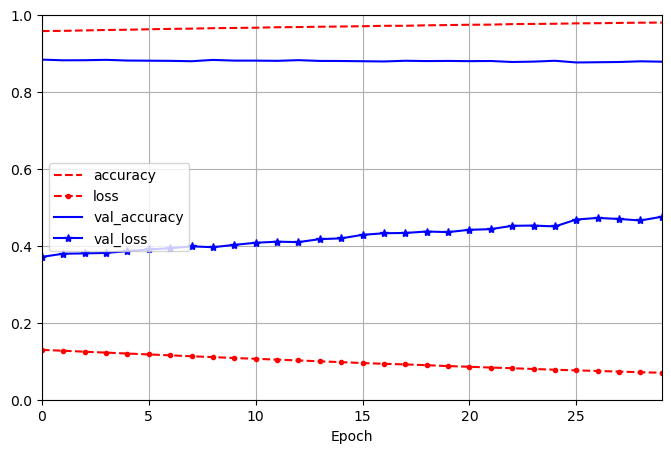

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, 
    xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. This is good. The validation curves are relatively close to each other at first, but they get further apart over time, which shows that there’s a little bit of overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training, but that’s not actually the case. The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch, so the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. This is as simple as calling the fit() method again, since Keras just continues training where it left off: you should be able to reach about 89.8% validation accuracy, while the training accuracy will continue to rise up to 100% (this is not always the case).

If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the ***fit()*** method using the ***batch_size*** argument, which defaults to 32). We will get back to hyperparameter tuning at the end of this chapter. Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the ***evaluate()*** method (it also supports several other arguments, such as ***batch_size*** and ***sample_weight***; please check the documentation for more details):


In [39]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8744 - loss: 0.5145


[0.49801069498062134, 0.8743000030517578]

 As you saw in Chapter 2, it is common to get slightly lower performance on
 the test set than on the validation set, because the hyperparameters are tuned
 on the validation set, not the test set (however, in this example, we did not
 do any hyperparameter tuning, so the lower accuracy is just bad luck).
 Remember to resist the temptation to tweak the hyperparameters on the test
 set, or else your estimate of the generalization error will be too optimistic.

#### **Using the model to make predictions**
